In [190]:
#Let's import our key libraries here...
#These are the toolboxes that hold the tools to solve our problems
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import scipy.optimize as optimization
palatinate='#68246D' #this is a surprise tool we will use later
##for abspath use: os.path.abspath("src/examplefile.txt")
def message():
    print("""How nice. You should come back to this yourself later... and play around""")

<font size="20">**Fun**

Now that you're familiar with having fun with functions and making a simple plot, you must be wondering: "Forget made up things! What if I already have data and I just want to see it?"
Alright, let's have a look...
Let's say I have a bunch of data and it's saved to a csv...
If you're SOFI_C9 you'll remember our rheology case study (I know, I know, but let's just forget it's rheology and just do it for the plot xD)
I have indeed uploaded a full project's worth of work, so if you do want to see the original rushed code - in which I did not use pandas, like a baffoon - then feel free to browse the Rheology Plots file. Otherwise, let's do this step by step.

Ok, I lied... These csv files don't have column titles. So let's just write that in here so we don't forget first.

Point No.	Shear Rate	Shear Stress	Shear Strain	Viscosity	Normal Force	Torque

[] [1/s]	[Pa]	[%]	[mPa·s]	[N]	[mN·m]

Back to it then. Let's load our files

In [93]:
df = pd.read_csv("../data/ACS2/GR4SM14.csv", encoding="UTF-16") #sometimes you need to change the encoding. F

#Let's see what we just loaded as a dataframe, df
print(df)
print("it's big so we can just do this one in the future...", df.head())

         \t1\t0.1\t7.2632\t225\t72625\t-0.04\t0.13663
0       \t2\t0.158\t8.086\t657\t51017\t-0.04\t0.15211
1   \t3\t0.251\t9.0729\t1.34E+03\t36119\t-0.04\t0....
2   \t4\t0.398\t10.217\t2.42E+03\t25670\t-0.05\t0....
3   \t5\t0.631\t11.592\t4.14E+03\t18372\t-0.04\t0....
4     \t6\t1\t13.192\t6.86E+03\t13192\t-0.04\t0.24816
5   \t7\t1.58\t14.958\t1.12E+04\t9437.6\t-0.04\t0....
6    \t8\t2.51\t16.905\t1.8E+04\t6729.7\t-0.04\t0.318
7   \t9\t3.98\t19.172\t2.89E+04\t4815.6\t-0.04\t0....
8   \t10\t6.31\t22.185\t4.6E+04\t3516.1\t-0.03\t0....
9   \t11\t10\t26.766\t7.33E+04\t2676.6\t-0.03\t0.5...
10  \t12\t15.8\t34.108\t1.16E+05\t2152\t-0.03\t0.6...
11  \t13\t25.1\t45.201\t1.85E+05\t1799.5\t-0.03\t0...
12  \t14\t39.8\t60.819\t2.93E+05\t1527.7\t-0.02\t1...
13  \t15\t63.1\t82.059\t4.65E+05\t1300.5\t0.00\t1....
14  \t16\t100\t111.19\t7.37E+05\t1111.9\t0.02\t2.0916
15     \t1\t100\t111.68\t1.04E+06\t1117\t0.02\t2.1009
16  \t2\t63.1\t83.375\t1.25E+06\t1321.4\t-0.01\t1....
17  \t3\t39.8\t61.693\t1.39E

In [94]:
#Interesting, we need to change the delimiter/separator
delim='\t'
#and the column headers
headers=['younglings','Test','Shear Rate[1/s]','Shear Stress[Pa]','Shear Strain[%]',
         'Viscosity[mPa·s]','Normal Force[N]','Torque[mN·m]']
#Then load our data as follows:
df = pd.read_csv("../data/ACS2/GR4SM14.csv", encoding="UTF-16", sep=delim, header=None)
df.columns=headers
df.head()
#I've had to do it in this way because csv files are tricky... 
#so just be careful and take your time with these things. Google everything as you go. 
#Someone has dealt with your problem before.

,younglings,Test,Shear Rate[1/s],Shear Stress[Pa],Shear Strain[%],Viscosity[mPa·s],Normal Force[N],Torque[mN·m]
0,NaN,1,0.100,7.2632,225.0,72625.0,-0.04,0.13663
1,NaN,2,0.158,8.0860,657.0,51017.0,-0.04,0.15211
2,NaN,3,0.251,9.0729,1340.0,36119.0,-0.04,0.17067
3,NaN,4,0.398,10.2170,2420.0,25670.0,-0.05,0.19220
4,NaN,5,0.631,11.5920,4140.0,18372.0,-0.04,0.21806


In [95]:
print('if you run this cell twice what happens and why?')
#I don't like the younglings but it's not bothering me so we can leave it there.
#If it does bother you then remove it... Fine.
df=df.drop(['younglings'],axis=1) #redefining df as what it used to be minus the column you hate.
#...you left me no choice.
print(df.head())
print( 'the dark side of the force wins :/')


if you run this cell twice what happens and why?
   Test  Shear Rate[1/s]  Shear Stress[Pa]  Shear Strain[%]  Viscosity[mPa·s]  \
0     1            0.100            7.2632            225.0           72625.0   
1     2            0.158            8.0860            657.0           51017.0   
2     3            0.251            9.0729           1340.0           36119.0   
3     4            0.398           10.2170           2420.0           25670.0   
4     5            0.631           11.5920           4140.0           18372.0   

   Normal Force[N]  Torque[mN·m]  
0            -0.04       0.13663  
1            -0.04       0.15211  
2            -0.04       0.17067  
3            -0.05       0.19220  
4            -0.04       0.21806  
the dark side of the force wins :/


In [112]:
#As you can see if we look at our data it is nice and clean
df

,Test,Shear Rate[1/s],Shear Stress[Pa],Shear Strain[%],Viscosity[mPa·s],Normal Force[N],Torque[mN·m]
0,1,0.100,7.2632,225.0,72625.0,-0.04,0.13663
1,2,0.158,8.0860,657.0,51017.0,-0.04,0.15211
2,3,0.251,9.0729,1340.0,36119.0,-0.04,0.17067
3,4,0.398,10.2170,2420.0,25670.0,-0.05,0.19220
4,5,0.631,11.5920,4140.0,18372.0,-0.04,0.21806
5,6,1.000,13.1920,6860.0,13192.0,-0.04,0.24816
6,7,1.580,14.9580,11200.0,9437.6,-0.04,0.28138
7,8,2.510,16.9050,18000.0,6729.7,-0.04,0.31800
8,9,3.980,19.1720,28900.0,4815.6,-0.04,0.36065
9,10,6.310,22.1850,46000.0,3516.1,-0.03,0.41734


In [126]:
#Oe last thing I want to do is change that Test column. 
#We know we are loading, unloading and then loading again and so9me we aren't even reloading...
#Let's label that accordingly...

#Make our new column labels
a=["loading",]*16
b=["unloading",]*16
c=["reloading",]*16

#print(a)
d=a+b
e=a+b+c
#print(d)
df['Test']=d
df
#Let's replace the old column with the new one...
#df.loc[:,('Test')] #This isolates the column we want to change
#df.loc[:,('Test')].replace()

,Test,Shear Rate[1/s],Shear Stress[Pa],Shear Strain[%],Viscosity[mPa·s],Normal Force[N],Torque[mN·m]
0,loading,0.100,7.2632,225.0,72625.0,-0.04,0.13663
1,loading,0.158,8.0860,657.0,51017.0,-0.04,0.15211
2,loading,0.251,9.0729,1340.0,36119.0,-0.04,0.17067
3,loading,0.398,10.2170,2420.0,25670.0,-0.05,0.19220
4,loading,0.631,11.5920,4140.0,18372.0,-0.04,0.21806
5,loading,1.000,13.1920,6860.0,13192.0,-0.04,0.24816
6,loading,1.580,14.9580,11200.0,9437.6,-0.04,0.28138
7,loading,2.510,16.9050,18000.0,6729.7,-0.04,0.31800
8,loading,3.980,19.1720,28900.0,4815.6,-0.04,0.36065
9,loading,6.310,22.1850,46000.0,3516.1,-0.03,0.41734


In [130]:
#Let's make a function that does all of the above so we can do it for all our files quickly

def dataframe(filename,delim='\t', headers=['younglings','Test','Shear Rate[1/s]','Shear Stress[Pa]','Shear Strain[%]',
         'Viscosity[mPa·s]','Normal Force[N]','Torque[mN·m]'], ):
    """
    Arguments:
    filename
    
    optional arguments:
    delimiter, headers
    
    Returns:
    clean dataframe of file data
    """
    #get raw
    df = pd.read_csv("../data/ACS2/GR4SM14.csv", encoding="UTF-16", sep=delim, header=None)
    #intro headers
    df.columns=headers
    #kill younglihngs
    df=df.drop(['younglings'],axis=1)
    #clean up
    #Make our new column labels
    a=["loading",]*16
    b=["unloading",]*16
    c=["reloading",]*16
    #for a smaller file
    if len(df)==32:
        d=a+b
    #for a bigger file
    if len(df)==48:
        d=a+b+c
    df['Test']=d
    
    return df
    
    

In [155]:
dataframe("../data/ACS2/GR4SM14.csv")
#tadah

,Test,Shear Rate[1/s],Shear Stress[Pa],Shear Strain[%],Viscosity[mPa·s],Normal Force[N],Torque[mN·m]
0,loading,0.100,7.2632,225.0,72625.0,-0.04,0.13663
1,loading,0.158,8.0860,657.0,51017.0,-0.04,0.15211
2,loading,0.251,9.0729,1340.0,36119.0,-0.04,0.17067
3,loading,0.398,10.2170,2420.0,25670.0,-0.05,0.19220
4,loading,0.631,11.5920,4140.0,18372.0,-0.04,0.21806
5,loading,1.000,13.1920,6860.0,13192.0,-0.04,0.24816
6,loading,1.580,14.9580,11200.0,9437.6,-0.04,0.28138
7,loading,2.510,16.9050,18000.0,6729.7,-0.04,0.31800
8,loading,3.980,19.1720,28900.0,4815.6,-0.04,0.36065
9,loading,6.310,22.1850,46000.0,3516.1,-0.03,0.41734


<font size="20">**Starting to Plot**
    

In [177]:
df=dataframe("../data/ACS2/GR4SM32.csv")
df.iloc['Type'=='loading']

TypeError: Cannot index by location index with a non-integer key

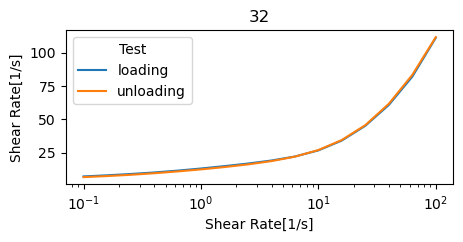

How nice. You should come back to this yourself later... and play around


In [192]:
#Cool thing is we can straight up plot whatever we want from this!
#And with pandas dataframes it's all basically self contained too!
#Still need to load and use matplotlib but it's great!
df=dataframe("../data/ACS2/GR4SM32.csv")
#df['Shear Rate[1/s]'].plot(kind='line')#,'Shear Rate[1/s]')
#df.groupby('Test')['Shear Rate[1/s]'].plot(kind='kde')
#plt.legend(['loading','unloading'])
to_plot=df.pivot(index='Shear Rate[1/s]',columns='Test',values='Shear Stress[Pa]')

to_plot.plot(figsize=(5,2), logx=True, ylabel='Shear Rate[1/s]',title='32')

plt.show()
message()
